In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import box

import sys
sys.path.append("../..")

from objectherkenning_openbare_ruimte.frame_extraction import metadata_helper
from objectherkenning_openbare_ruimte.data_sampling import data_sampling, decos_helper

In [12]:
import geopandas as gpd

gdf = gpd.read_file("../../datasets/oor/velotech_sample/metadata.gpkg", crs="EPSG:28992")

In [13]:
gdf

,path,frame_src,frame_id,permit,sample,geometry
0,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,0-0-D14M03Y2024-H12M56S12,1,False,False,POINT (120051.032 487217.081)
1,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,0-0-D14M03Y2024-H12M56S12,2,False,False,POINT (120051.367 487217.234)
2,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,0-0-D14M03Y2024-H12M56S12,3,False,False,POINT (120054.625 487218.569)
3,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,0-0-D14M03Y2024-H12M56S12,4,False,False,POINT (120058.123 487220.213)
4,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,0-0-D14M03Y2024-H12M56S12,5,False,False,POINT (120063.727 487222.955)
...,...,...,...,...,...,...
13660,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,9-0-D17M02Y2024-H21M03S32,297,False,False,POINT (121400.285 486096.098)
13661,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,9-0-D17M02Y2024-H21M03S32,298,False,False,POINT (121405.342 486095.485)
13662,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,9-0-D17M02Y2024-H21M03S32,299,False,False,POINT (121409.683 486094.755)
13663,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,9-0-D17M02Y2024-H21M03S32,300,False,False,POINT (121415.450 486093.436)


<Axes: >

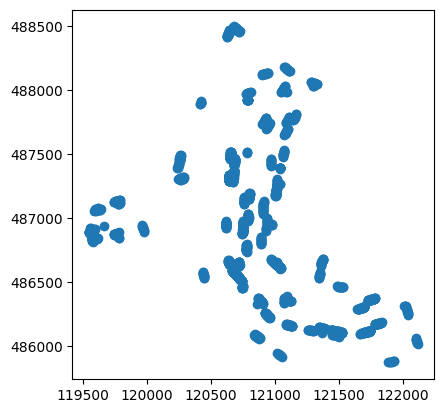

In [23]:
gdf[gdf.permit].plot()

In [34]:
from shapely.geometry import box
normal_bounds = box(*(gdf[gdf.permit].total_bounds))
gdf[~gdf["geometry"].within(normal_bounds)]

,path,frame_src,frame_id,permit,sample,geometry
300,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,0-0-D14M03Y2024-H12M56S12,301,False,False,None
301,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,0-0-D17M02Y2024-H20M10S31,1,False,False,POINT (-587791.597 -5732776.631)
302,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,0-0-D17M02Y2024-H20M10S31,2,False,False,POINT (-587791.597 -5732776.631)
303,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,0-0-D17M02Y2024-H20M10S31,3,False,False,POINT (-587791.597 -5732776.631)
304,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,0-0-D17M02Y2024-H20M10S31,4,False,False,POINT (-587791.597 -5732776.631)
...,...,...,...,...,...,...
10654,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,4-0-D17M02Y2024-H20M30S42,301,False,False,None
11256,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,5-0-D17M02Y2024-H20M35S45,301,False,False,None
11858,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,6-0-D17M02Y2024-H20M40S49,301,False,False,None
12460,/mnt/azureml/cr/j/5ef37e4487cd4931b9959ef37429...,7-0-D17M02Y2024-H20M45S52,301,False,False,None


In [ ]:
input_folder = "../data/velotech"
output_folder = "../data/velotech/frames/metadata"

metadata_helper.process_metadata(input_folder, output_folder)

In [ ]:
input_folder = "../data/velotech/frames/20240411-133650"
metadata_folder = "../data/velotech/frames/metadata"
decos_folder = "../data/decos/"
output_folder = "../data/velotech/frames/keep"

decos_buffer = 50
n_frames = 1500
sampling_weight = 1.0

In [ ]:

decos_gdf = decos_helper.load_and_combine_decos(decos_folder)
frame_gdf = data_sampling.load_frame_gdf(input_folder, metadata_folder, decos_gdf, decos_buffer)
frame_gdf = data_sampling.sample_frames(frame_gdf, n_frames, sampling_weight)

In [ ]:
n_sampled = np.count_nonzero(frame_gdf["sample"])
n_with_permit = np.count_nonzero(frame_gdf["sample"] & frame_gdf["permit"])
ratio = (n_with_permit / n_sampled) * 100
print(f"Sampled {n_sampled} frames, of which {n_with_permit} in permit zone ({ratio}%)")

In [ ]:
data_sampling.copy_sample(frame_gdf, output_folder)

In [ ]:
!poetry run python ../objectherkenning_openbare_ruimte/data_sampling/data_sampling.py --input_folder {input_folder} --metadata_folder {metadata_folder} --decos_folder {decos_folder} --output_folder {output_folder}

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 8), constrained_layout=True)

meta_bb = box(*frame_gdf.total_bounds)

frame_gdf.plot(ax=ax, column="permit", marker=".")
decos_gdf.clip(meta_bb.buffer(decos_buffer)).plot(ax=ax, color="black", marker='*')
decos_gdf.clip(meta_bb.buffer(decos_buffer)).buffer(50).plot(ax=ax, facecolor="none", edgecolor='black')

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 8), constrained_layout=True)

meta_bb = box(*frame_gdf.total_bounds)

frame_gdf.loc[frame_gdf["sample"], :].plot(ax=ax, column="permit", marker=".")
decos_gdf.clip(meta_bb.buffer(decos_buffer)).plot(ax=ax, color="black", marker='*')
decos_gdf.clip(meta_bb.buffer(decos_buffer)).buffer(50).plot(ax=ax, facecolor="none", edgecolor='black')